# TensorFlow/Keras Basics Notebook
### *Build your first neural networks & CNNs*

## Importing Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Build a Simple Neural Network

In [2]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10,)),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

d:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

## Train Model on Random Data
(Demo purpose only)

In [3]:
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5040 - loss: 0.7009
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5110 - loss: 0.6942
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5140 - loss: 0.6931
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5120 - loss: 0.6933
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5200 - loss: 0.6928


## Build a Simple CNN

In [4]:
cnn = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
cnn.summary()

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

## Train CNN on Dummy Images

In [5]:
X = np.random.rand(200, 64, 64, 1)
y = np.random.randint(0, 2, 200)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X, y, epochs=3)

Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4750 - loss: 0.7136
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5100 - loss: 0.7098
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4650 - loss: 0.6976


## Build a U-Net Block (Foundation for Segmentation Models)

In [6]:
def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x

inp = layers.Input((128,128,1))
out = conv_block(inp, 16)
unet_demo = models.Model(inp, out)
unet_demo.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │         2,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,480 (9.69 KB)

 Trainable params: 2,480 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

## **Exercises**
1. Modify the CNN to include **Dropout**.
2. Add more convolution layers to increase accuracy.
3. Build the **encoder part** of U-Net using conv_block.
4. Train CNN on a real dataset (MNIST or CIFAR10).
5. Plot training curves (loss & accuracy) using matplotlib.


In [7]:
# Modified CNN to include dropout and bmore convolutional layers
cnn_mod = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [8]:
# Building the encoder part of U-net using the conv_block function
inputs = layers.Input((128,128,1))
c1 = conv_block(inputs, 32)
p1 = layers.MaxPooling2D()(c1)
c2 = conv_block(p1, 64)
p2 = layers.MaxPooling2D()(c2)
c3 = conv_block(p2, 128)
p3 = layers.MaxPooling2D()(c3)
u_net = models.Model(inputs, p3)
u_net.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,432 (1.09 MB)

 Trainable params: 286,432 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# traing the CNN on MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
cnn_mnist = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9587 - loss: 0.1338 - val_accuracy: 0.9804 - val_loss: 0.0601
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9867 - loss: 0.0443 - val_accuracy: 0.9876 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9872 - val_loss: 0.0412
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9931 - loss: 0.0220 - val_accuracy: 0.9887 - val_loss: 0.0327
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9948 - loss: 0.0167 - val_accuracy: 0.9907 - val_loss: 0.0329


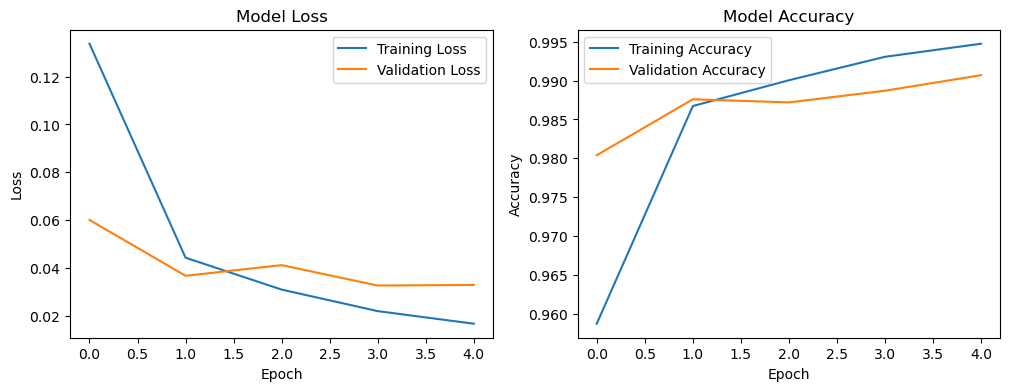

In [11]:
# Ploting the curve of loss and accuracy using matplotlib
import matplotlib.pyplot as plt
cnn_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = cnn_mnist.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()